In [1]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import math
import re
from collections import Counter
import scipy.stats
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter

In [2]:
stopwordlst = set(stopwords.words('english'))
# additional_stop_words = ['scatter','couple','uber','der','zur','und','I','ii','l','superconducting']
stopwordlst.update(additional_stop_words)

lemmatizer = WordNetLemmatizer()

def get_verbs_list(f):
    verbs_list = []
    for i in f['title'].values:
        if type(i) != float:
            for j in i.split():
                if j not in stopwordlst:
                    pos_tag = nltk.pos_tag([j])[0][1]  # Get the Part-of-Speech tag
                    if pos_tag.startswith('V'):  # Check if the word is a verb
                        lemmatized_verb = lemmatizer.lemmatize(j, 'v')  # Lemmatize the verb
                        if lemmatized_verb not in stopwordlst:
                            verbs_list.append(lemmatized_verb)
    return verbs_list

In [3]:
def get_nones_list(f):
    verbs_list = []
    for i in f['title'].values:
        if type(i) != float:
            for j in i.split():
                if j not in stopwordlst:
                    pos_tag = nltk.pos_tag([j])[0][1]  # Get the Part-of-Speech tag
                    if pos_tag.startswith('N'):  # Check if the word is a verb
                        lemmatized_verb = lemmatizer.lemmatize(j, 'n')  # Lemmatize the verb
                        if lemmatized_verb not in stopwordlst:
                            verbs_list.append(lemmatized_verb)
    return verbs_list

# import data

In [4]:
path11 = r'E:\netData\MAGzip\MAG Nobel\2 Nobelpapers\712 NobelpapersCD.zip'
path12 = r'E:\netData\MAGzip\MAG Nobel\2 Nobelpapers\712 Nobelpapers.zip'
path21 = r'E:\netData\MAGzip\MAG Nobel\2 NobelpaperControls\20954 NobelpapercontrolsCD.zip'
path22 = r'E:\netData\MAGzip\MAG Nobel\2 NobelpaperControls\20954 Nobelpapercontrols.zip'

fNobel1 = pd.read_csv(path11)
fControl1 = pd.read_csv(path21)
fNobel2 = pd.read_csv(path12)
fControl2 = pd.read_csv(path22)

fNobel = pd.concat([fNobel1 , fNobel2] , axis = 1)
fControl = pd.concat([fControl1 , fControl2] , axis = 1)

fNobel = fNobel.loc[:, ~fNobel.columns.duplicated()]
fControl = fControl.loc[:, ~fControl.columns.duplicated()]

fNobel.fillna(0 , inplace=True)
fControl.fillna(0 , inplace=True)

fNobel['titlelength'] = fNobel['title'].apply(len)
fControl['titlelength'] = fControl['title'].apply(len)

fControl['If Prize'] = 0
fNobel['If Prize'] = 1

fNobel1 = fNobel[fNobel['Field']=='Physics']
fNobel2 = fNobel[fNobel['Field']=='Chemistry']
fNobel3 = fNobel[fNobel['Field']=='Medicine']

fControl1 = fControl[fControl['Field']=='Physics']
fControl2 = fControl[fControl['Field']=='Chemistry']
fControl3 = fControl[fControl['Field']=='Medicine']

In [5]:
df1 = pd.concat([fNobel1 , fControl1])
df2 = pd.concat([fNobel2 , fControl2])
df3 = pd.concat([fNobel3 , fControl3])

df1.index = range(len(df1))
df2.index = range(len(df2))
df3.index = range(len(df3))

In [6]:
df1 = df1.sort_values('ni')
df1.index = range(len(df1))
split_index = len(df1) // 2
df1['type'] = 0
df1.loc[split_index:, 'type'] = 1

df2 = df2.sort_values('ni')
df2.index = range(len(df2))
split_index = len(df2) // 2
df2['type'] = 0
df2.loc[split_index:, 'type'] = 1

df3 = df3.sort_values('ni')
df3.index = range(len(df3))
split_index = len(df3) // 2
df3['type'] = 0
df3.loc[split_index:, 'type'] = 1

# Title length

In [7]:
x_pos = [1,2,3,5,6,7,]

d1 = df1.loc[df1['type']==1 , 'titlelength']
d2 = df2.loc[df2['type']==1 , 'titlelength']
d3 = df3.loc[df3['type']==1 , 'titlelength']
d5 = df1.loc[df1['type']==0 , 'titlelength']
d6 = df2.loc[df2['type']==0 , 'titlelength']
d7 = df3.loc[df3['type']==0 , 'titlelength']
d = [np.mean(d1),np.mean(d2),np.mean(d3),np.mean(d5),np.mean(d6),np.mean(d7)]
std = [np.std(d1)*len(d1)**-0.5,np.std(d2)*len(d2)**-0.5,np.std(d3)*len(d3)**-0.5,np.std(d5)*len(d5)**-0.5,np.std(d6)*len(d6)**-0.5,np.std(d7)*len(d7)**-0.5]
colors = ["#154360","#1A5276","#1F618D","#6E2C00","#873600","#A04000"]

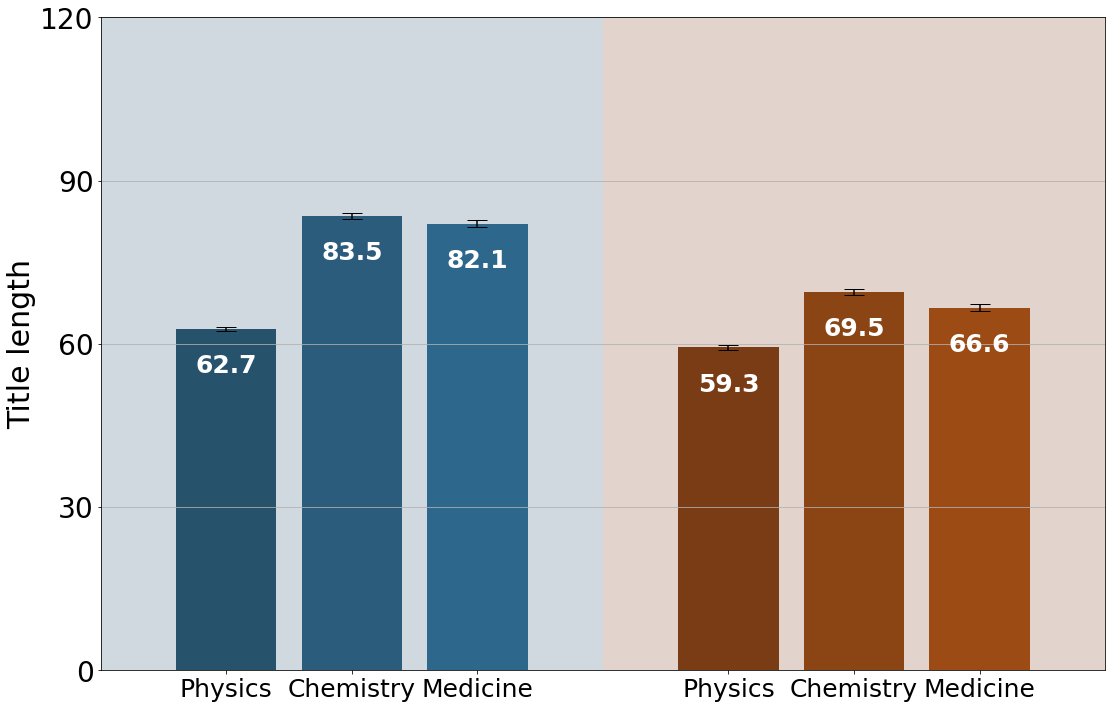

In [8]:
f, ax = plt.subplots(figsize=(18, 12))

plt.bar(x_pos, d, yerr=std,align='center', color= colors,alpha=0.9,capsize=10)
ax.yaxis.grid(True)
plt.xticks(x_pos,['Physics','Chemistry','Medicine','Physics','Chemistry','Medicine'],fontsize = 25)
plt.yticks([0,30,60,90,120],size = 28)
plt.ylabel(r'Title length',fontsize = 30)
plt.xlim(0,8)
for _ in range(len(d)):
    plt.text(x_pos[_],d[_]-8 , str(np.round(d[_] , 1)),fontsize = 25,c = 'white', ha='center', fontweight='bold')
    
ax.axvspan(min(x_pos)-1, max(x_pos) / 2+0.5, facecolor='#154360', alpha=0.2)
ax.axvspan(max(x_pos) / 2+0.5, max(x_pos)+1, facecolor='#6E2C00', alpha=0.2)

plt.savefig(r"G:\A J YANG PAPER\MAG analysis\papers Nobel\QSS Disruptive citation for Nobel Prize papers\fig\fig 8\1.pdf",bbox_inches = 'tight')

In [22]:
print(scipy.stats.mannwhitneyu(d1 , d5, alternative='two-sided'))
print(scipy.stats.mannwhitneyu(d2 , d6, alternative='two-sided'))
print(scipy.stats.mannwhitneyu(d3 , d7, alternative='two-sided'))

MannwhitneyuResult(statistic=4965869.5, pvalue=1.0164240708097627e-10)
MannwhitneyuResult(statistic=13255216.5, pvalue=2.965370138370676e-94)
MannwhitneyuResult(statistic=6626099.0, pvalue=3.986383607233413e-86)


In [19]:
x_pos = [1,2,3,5,6,7,]

d1 = df1.loc[df1['type']==1 , 'If Prize']
d2 = df2.loc[df2['type']==1 , 'If Prize']
d3 = df3.loc[df3['type']==1 , 'If Prize']
d5 = df1.loc[df1['type']==0 , 'If Prize']
d6 = df2.loc[df2['type']==0 , 'If Prize']
d7 = df3.loc[df3['type']==0 , 'If Prize']
d = [sum(d1),sum(d2),sum(d3),sum(d5),sum(d6),sum(d7)]
colors = ["#154360","#1A5276","#1F618D","#6E2C00","#873600","#A04000"]

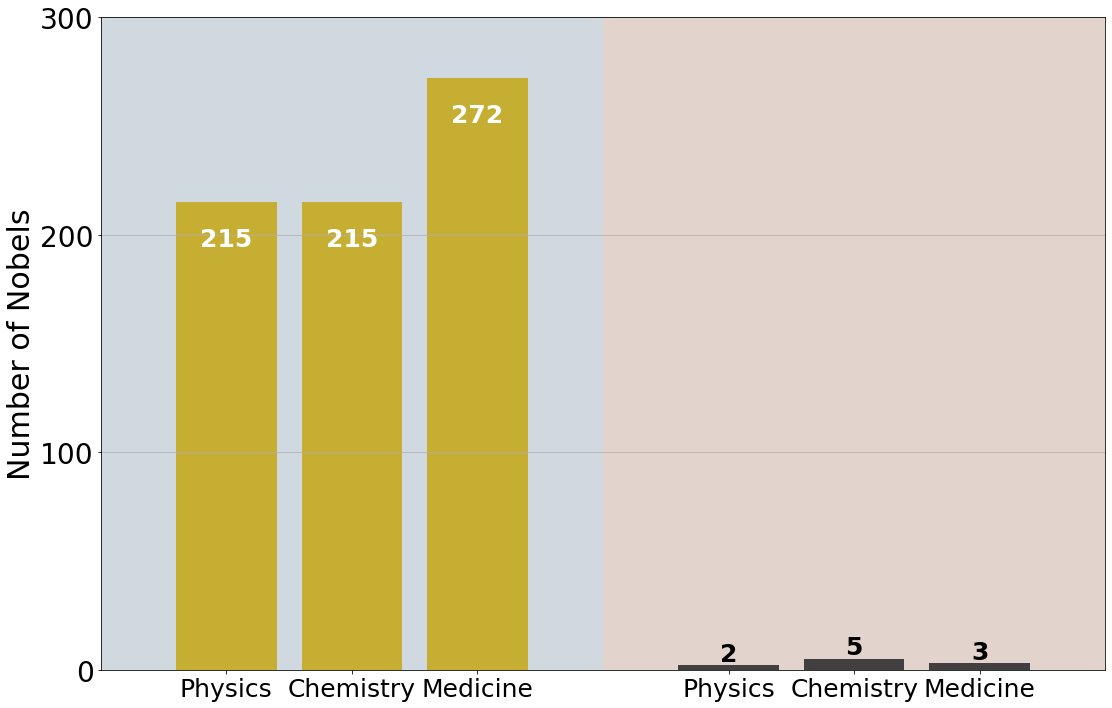

In [20]:
f, ax = plt.subplots(figsize=(18, 12))

plt.bar(x_pos, d, color= colors,alpha=0.9,capsize=10)
ax.yaxis.grid(True)
plt.xticks(x_pos,['Physics','Chemistry','Medicine','Physics','Chemistry','Medicine'],fontsize = 25)
plt.yticks([0,100,200,300],size = 28)
plt.ylabel(r'Number of Nobels',fontsize = 30)
plt.xlim(0,8)
for _ in range(len(d)):
    if d[_]>200:
        plt.text(x_pos[_],d[_]-20 , str(np.round(d[_] , 1)),fontsize = 25,c = 'white', ha='center', fontweight='bold')
    else:
        plt.text(x_pos[_],d[_]+2 , str(np.round(d[_] , 1)),fontsize = 25,c = 'black', ha='center', fontweight='bold')
    
ax.axvspan(min(x_pos)-1, max(x_pos) / 2+0.5, facecolor='#154360', alpha=0.2)
ax.axvspan(max(x_pos) / 2+0.5, max(x_pos)+1, facecolor='#6E2C00', alpha=0.2)

plt.savefig(r"G:\A J YANG PAPER\MAG analysis\papers Nobel\QSS Disruptive citation for Nobel Prize papers\fig\fig 8\0.pdf",bbox_inches = 'tight')

# get verbs

In [10]:
f11 = df1[df1['type'] == 1]
f21 = df2[df2['type'] == 1]
f31 = df3[df3['type'] == 1]
f12 = df1[df1['type'] == 0]
f22 = df2[df2['type'] == 0]
f32 = df3[df3['type'] == 0]

f1 = pd.concat([f11 , f21 , f31])
f2 = pd.concat([f12 , f22 , f32])

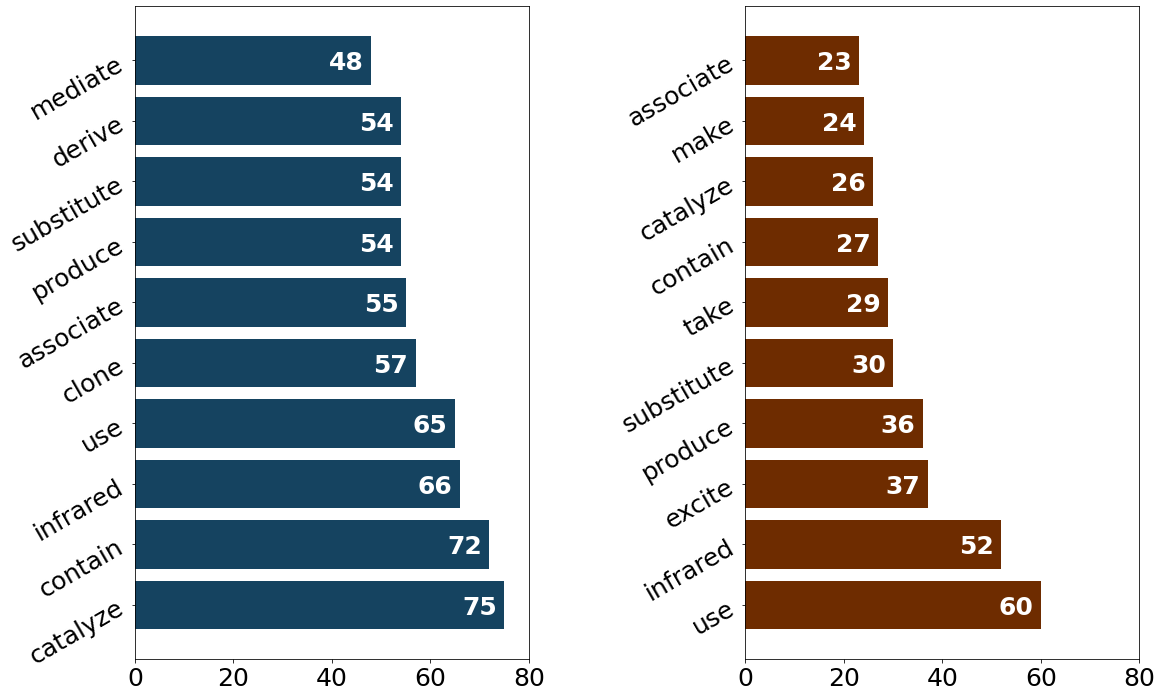

In [15]:
plt.subplots(1,2,figsize=(18,12))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.55,hspace=0.2)

flst = [f1,f2]
y_pos = range(1,11)
colors = ["#154360","#6E2C00"]
for j in range(2):
    d = pd.DataFrame(Counter(get_verbs_list(flst[j])).most_common(10))
    ax = plt.subplot(1,2,j+1)
    x = d[1].values
    plt.barh(y_pos , x ,align='center',color=colors[j],alpha=1 )
    plt.xticks([0,20,40,60,80],size = 25)
    plt.yticks(y_pos ,d[0].values ,size = 25)
    for _ in range(len(x)):
        text = x[_]
        plt.text(text-5,y_pos[_]-0.15 , str(np.round(text , 3)),fontsize = 25,c = 'white', ha='center', fontweight='bold')
    ax.tick_params(axis='y', which='major', labelrotation=30)
plt.savefig(r"G:\A J YANG PAPER\MAG analysis\papers Nobel\QSS Disruptive citation for Nobel Prize papers\fig\fig 8\2.pdf",bbox_inches = 'tight')

# get nones

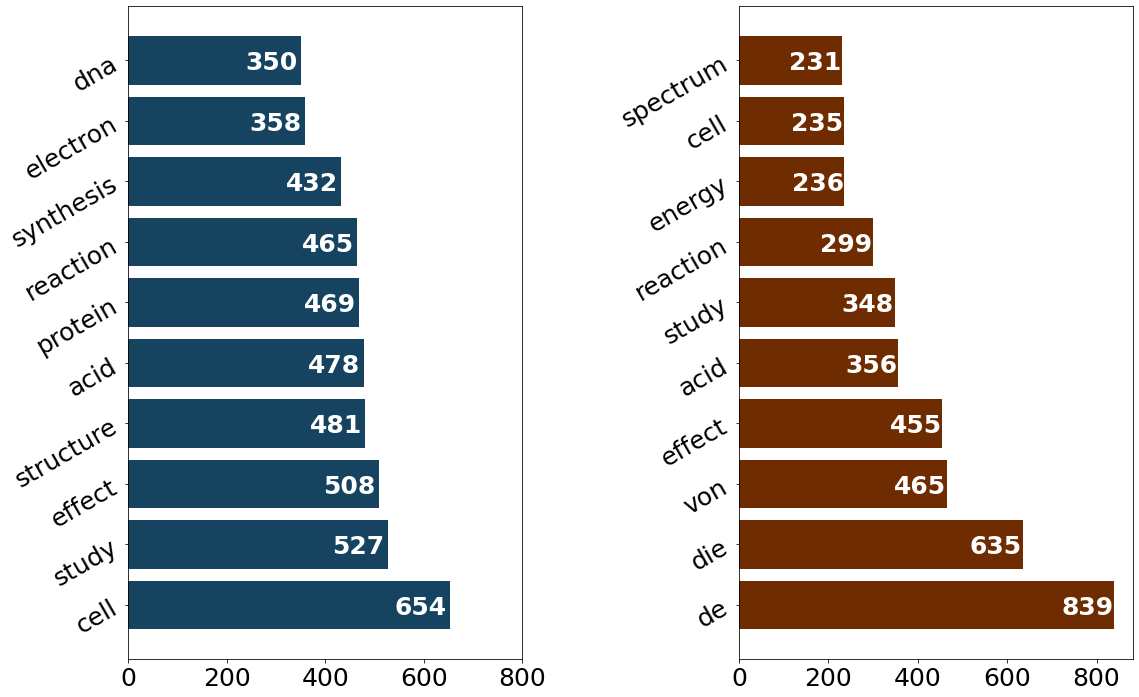

In [16]:
plt.subplots(1,2,figsize=(18,12))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.55,hspace=0.2)

flst = [f1,f2]
y_pos = range(1,11)
colors = ["#154360","#6E2C00"]
for j in range(2):
    d = pd.DataFrame(Counter(get_nones_list(flst[j])).most_common(10))
    ax = plt.subplot(1,2,j+1)
    x = d[1].values
    plt.barh(y_pos , x ,align='center',color=colors[j],alpha=1 )
    plt.xticks([0,200,400,600,800],size = 25)
    plt.yticks(y_pos ,d[0].values ,size = 25)
    for _ in range(len(x)):
        text = x[_]
        plt.text(text-60,y_pos[_]-0.15 , str(np.round(text , 3)),fontsize = 25,c = 'white', ha='center', fontweight='bold')
    ax.tick_params(axis='y', which='major', labelrotation=30)
plt.savefig(r"G:\A J YANG PAPER\MAG analysis\papers Nobel\QSS Disruptive citation for Nobel Prize papers\fig\fig 8\3.pdf",bbox_inches = 'tight')